In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('data/EMEWS_cleaned_with_nan.csv', parse_dates=['date'], index_col='date')
df.drop(columns=['day'], inplace=True)

In [21]:
# --- Set the global style and color palette for ALL plots ---
sns.set_style("whitegrid") # Adds a clean grid to the background
sns.set_palette("colorblind") # Uses Seaborn's colorblind-friendly default palette

print("Global plot style has been set.")

Global plot style has been set.


In [22]:
# --- Plot 1: Distribution of the Target Variable ---
print("Generating Plot 1: Target Variable Distribution...")
plt.figure(figsize=(10, 6))
sns.histplot(df['total_number_of_patients'], kde=True, bins=30)
plt.title('Distribution of Total Number of Patients')
plt.xlabel('Total Number of Patients')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

# # --- Plot 2: Patient Load Over Time ---
# print("Generating Plot 2: Time Series of Patient Load...")
# plt.figure(figsize=(15, 6))
# plt.plot(df.index, df['total_number_of_patients'], label='Total Patients')
# plt.title('Total Patient Load Over Time')
# plt.xlabel('Date')
# plt.ylabel('Total Number of Patients')
# plt.legend()
# plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# plt.savefig('fig_02_timeseries_plot.png', dpi=300, bbox_inches='tight')
# plt.close()
# print("...Done.")

# --- Plot 3: Weekly Pattern Analysis ---
print("Generating Plot 3: Weekly Patient Load Pattern...")
df['day_of_week'] = df.index.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(12, 7))
sns.boxplot(x='day_of_week', y='total_number_of_patients', data=df, order=day_order)
plt.title('Distribution of Patient Load by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_03_weekly_boxplot.png', dpi=300, bbox_inches='tight')
plt.close()
temp_df = df.drop(columns=['day_of_week'])
print("...Done.")

# --- Plot 4: Correlation Heatmap ---
print("Generating Plot 4: Correlation Heatmap...")
# Select a subset of key numerical columns for clarity
columns_for_corr = [
    'total_number_of_patients',
    'zone_a_mwr_patients',
    'zone_a__patients',
    'zone_b/c_patients',
    'total_number_of_emews',
    'zone_a_mwr_escalations',
    'zone_a__escalations',
    'zone_b/c_escalations',
    'zone_a_mwr_cat_3',
    'zone_a__cat_3',
    'zone_b/c_cat_3'
]
corr_matrix = temp_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig('fig_04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

print("\nAll figures have been generated and saved.")

Generating Plot 1: Target Variable Distribution...
...Done.
Generating Plot 3: Weekly Patient Load Pattern...
...Done.
Generating Plot 4: Correlation Heatmap...
...Done.

All figures have been generated and saved.


In [23]:
plt.figure(figsize=(12, 7))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.violinplot(x='day_of_week', y='total_number_of_patients', data=df, order=day_order)
plt.title('Distribution of Patient Load by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_05_weekly_violinplot.png', dpi=300, bbox_inches='tight')
plt.close()

# --- Violin Plot for Escalations in Zone A ---
plt.figure(figsize=(12, 7))
sns.violinplot(x='day_of_week', y='zone_a__escalations', data=df, order=day_order)
plt.title('Distribution of Patient Escalations in Zone A by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Escalations in Zone A')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_06_escalations_violinplot.png', dpi=300, bbox_inches='tight')
plt.close()

In [24]:
# --- Scatter Plot of a Key Predictor vs. Target ---
plt.figure(figsize=(10, 6))
sns.regplot(x='total_number_of_emews', y='total_number_of_patients', data=df,
            scatter_kws={'alpha':0.5}) # Make points semi-transparent
plt.title('Relationship between Total EMEWS Recordings and Patient Load')
plt.xlabel('Total Number of EMEWS Recordings')
plt.ylabel('Total Number of Patients')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('fig_07_emews_vs_patients_scatter.png', dpi=300, bbox_inches='tight')
plt.close()

In [25]:
print("Generating Plot 6: De-escalations by Day...")
plt.figure(figsize=(12, 7))
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.violinplot(x='day_of_week', y='zone_a__deescalations', data=df, order=day_order)
plt.title('Distribution of Patient De-escalations in Zone A by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of De-escalations in Zone A')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_06b_deescalations_violinplot.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

# --- Plot 7: Zonal Patient Load Comparison Over Time ---
print("Generating Plot 7: Zonal Patient Load Over Time...")
# Plotting a sample 2-month period for clarity
sample_df = df['2024-02-01':'2024-03-31']
plt.figure(figsize=(17, 7))
plt.plot(sample_df.index, sample_df['zone_a_mwr_patients'], label='Zone A (MWR)')
plt.plot(sample_df.index, sample_df['zone_a__patients'], label='Zone A (General)')
plt.plot(sample_df.index, sample_df['zone_b/c_patients'], label='Zone B/C')
plt.title('Comparison of Patient Loads Across Zones (Sample Period)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig_07b_zonal_timeseries.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")


Generating Plot 6: De-escalations by Day...
...Done.
Generating Plot 7: Zonal Patient Load Over Time...
...Done.


In [33]:
# --- 2. Feature Engineering for Plots ---

# Create a 'day_of_week' column for weekly analysis
df['day_of_week'] = df.index.day_name()
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]


# --- 3. Generate All Figures ---

# Figure 1: Correlation Matrix Heatmap
print("Generating Figure 1: Correlation Matrix Heatmap...")
# columns_for_corr = [
#     'total_number_of_patients', 'total_number_of_emews',
#     'zone_a_mwr_patients', 'zone_a__patients', 'zone_b/c_patients',
#     'zone_a_mwr_escalations', 'zone_a__escalations', 'zone_b/c_escalations',
#     'zone_a_mwr_cat_3', 'zone_a__cat_3', 'zone_b/c_cat_3',
#     'zone_a__deescalations'
# ]
temp_df = df.drop(columns=['day_of_week'])
corr_matrix = temp_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.savefig('fig_01_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

# Figure 2: Scatter Plot of EMEWS vs. Patients
print("Generating Figure 2: Scatter Plot...")
plt.figure(figsize=(10, 6))
sns.regplot(x='total_number_of_emews', y='total_number_of_patients', data=df,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red'}) # Make the regression line red for better visibility
plt.title('Relationship between Total EMEWS Recordings and Patient Load')
plt.xlabel('Total Number of EMEWS Recordings')
plt.ylabel('Total Number of Patients')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('fig_02_emews_vs_patients_scatter.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

# Figure 3: Histogram of Target Variable
print("Generating Figure 3: Target Variable Distribution...")
plt.figure(figsize=(10, 6))
sns.histplot(df['total_number_of_patients'], kde=True, bins=30)
plt.title('Distribution of Total Number of Patients (12-Hour Intervals)')
plt.xlabel('Total Number of Patients')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_03_target_distribution.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

# Figure 4: Violin Plot of Patient Load by Day
print("Generating Figure 4: Weekly Patient Load Violin Plot...")
plt.figure(figsize=(12, 7))
sns.violinplot(x='day_of_week', y='total_number_of_patients', data=df, order=day_order)
plt.title('Distribution of Patient Load by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Number of Patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_04_weekly_violinplot.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

# Figure 5: Violin Plot of Escalations by Day
print("Generating Figure 5: Weekly Escalations Violin Plot...")
plt.figure(figsize=(12, 7))
sns.violinplot(x='day_of_week', y='zone_a__escalations', data=df, order=day_order)
plt.title('Distribution of Patient Escalations in Zone A by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Escalations in Zone A')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_05_escalations_violinplot.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

# Figure 6: Violin Plot of De-escalations by Day
print("Generating Figure 6: Weekly De-escalations Violin Plot...")
plt.figure(figsize=(12, 7))
sns.violinplot(x='day_of_week', y='zone_a__deescalations', data=df, order=day_order)
plt.title('Distribution of Patient De-escalations in Zone A by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Number of De-escalations in Zone A')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_06_deescalations_violinplot.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

# Figure 7: Time Series of Zonal Patient Loads
print("Generating Figure 7: Zonal Patient Load Time Series...")
# Plotting a sample 2-month period for better visibility
sample_df = df['2024-02-01':'2024-03-31']
plt.figure(figsize=(17, 7))
plt.plot(sample_df.index, sample_df['zone_a_mwr_patients'], label='Zone A (MWR)')
plt.plot(sample_df.index, sample_df['zone_a__patients'], label='Zone A (General)')
plt.plot(sample_df.index, sample_df['zone_b/c_patients'], label='Zone B/C')
plt.title('Comparison of Patient Loads Across Zones (Sample Period)')
plt.xlabel('Date')
plt.ylabel('Number of Patients')
plt.legend() # This line adds the legend using the 'label' information from the plot commands
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.savefig('fig_07_zonal_timeseries.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")


Generating Figure 1: Correlation Matrix Heatmap...
...Done.
Generating Figure 2: Scatter Plot...
...Done.
Generating Figure 3: Target Variable Distribution...
...Done.
Generating Figure 4: Weekly Patient Load Violin Plot...
...Done.
Generating Figure 5: Weekly Escalations Violin Plot...
...Done.
Generating Figure 6: Weekly De-escalations Violin Plot...
...Done.
Generating Figure 7: Zonal Patient Load Time Series...
...Done.


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# --- Plot 8: Acuity Ratio by Zone ---
print("Generating Plot 8: Acuity Ratio by Zone...")
df['zone_a_acuity_ratio'] = df['zone_a__escalations'] / df['zone_a__patients']
df['zone_b_c_acuity_ratio'] = df['zone_b/c_escalations'] / df['zone_b/c_patients']

acuity_df = pd.melt(df[['zone_a_acuity_ratio', 'zone_b_c_acuity_ratio']],
                    var_name='Zone', value_name='Escalation Ratio')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Zone', y='Escalation Ratio', data=acuity_df)
plt.title('Comparison of Acuity Ratio (Escalations per Patient) by Zone')
plt.ylabel('Escalation Ratio')
plt.xticks(ticks=[0, 1], labels=['Zone A', 'Zone B/C'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('fig_08_acuity_ratio_boxplot.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

Generating Plot 8: Acuity Ratio by Zone...
...Done.
Generating Plot 9: Autocorrelation Plot...
...Done.

Additional recommended figures have been generated.


<Figure size 1200x600 with 0 Axes>

In [31]:
# --- Plot 9: Autocorrelation of Target Variable ---
print("Generating Plot 9: Autocorrelation Plot...")
plt.figure(figsize=(12, 6))

new_df = pd.read_csv('data/upsampled/mean_df.csv', parse_dates=['date'], index_col='date')
plot_acf(new_df['total_number_of_patients'].dropna(), lags=40) # Show up to 40 lags (20 days)
plt.title('Autocorrelation of Total Number of Patients')
plt.xlabel('Lag (1 lag = 12 hours)')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.savefig('fig_09_autocorrelation_plot.png', dpi=300, bbox_inches='tight')
plt.close()
print("...Done.")

print("\nAdditional recommended figures have been generated.")

Generating Plot 9: Autocorrelation Plot...
...Done.

Additional recommended figures have been generated.


<Figure size 1200x600 with 0 Axes>

## FEature selecetion

In [37]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, f_regression, mutual_info_regression

In [27]:
df = pd.read_csv('data/upsampled/mean_df.csv', parse_dates=['date'], index_col='date') 

In [44]:
X = df.drop(columns=['total_number_of_patients'])

y = df['total_number_of_patients']

In [45]:
k = 7
selector = SelectKBest(score_func=f_classif, k=k)

In [46]:
X_new = selector.fit_transform(X, y)

In [47]:
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]

In [48]:
selected_features

Index(['zone_a_mwr_patients', 'zone_a_mwr_cat_3', 'zone_a_mwr_sets_of_emews',
       'zone_a__patients', 'zone_a__cat_2', 'zone_a__sets_of_emews',
       'total_number_of_emews'],
      dtype='object')

In [33]:
selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_new = selector.fit_transform(X, y)
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
selected_features

Index(['zone_a_mwr_patients', 'zone_a_mwr_cat_3', 'zone_a__patients',
       'zone_b/c_escalations', 'total_number_of_emews'],
      dtype='object')

In [36]:
selector = SelectKBest(score_func=f_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get feature names
selected_features = X.columns[selector.get_support()]
selected_features

Index(['zone_a_mwr_patients', 'zone_a_mwr_cat_3', 'zone_a__patients',
       'zone_a__cat_2', 'total_number_of_emews'],
      dtype='object')

In [38]:
selector = SelectKBest(score_func=mutual_info_regression, k=k)
X_new = selector.fit_transform(X, y)

# Get feature names
selected_features = X.columns[selector.get_support()]
selected_features

Index(['zone_a_mwr_patients', 'zone_a_mwr_cat_3', 'zone_a_mwr_sets_of_emews',
       'zone_a__patients', 'total_number_of_emews'],
      dtype='object')

In [39]:
max_k = X.shape[1]
k_values = range(1, max_k + 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
results = []

# Loop through different values of k
for k in k_values:
    selector = SelectKBest(score_func=f_regression, k=k)
    X_new = selector.fit_transform(X, y)

    # Initialize model
    model = LinearRegression()

    # Evaluate using cross-validated R²
    scores = cross_val_score(model, X_new, y, cv=5, scoring='r2')
    mean_score = np.mean(scores)

    results.append((k, mean_score))

In [53]:
results_df = pd.DataFrame(results, columns=['k', 'R2'])
results_df

,k,R2
0,1,0.667369
1,2,0.674137
2,3,0.670422
3,4,0.669968
4,5,0.667638
5,6,0.816972
6,7,0.898489
7,8,0.897786
8,9,0.897082
9,10,0.896669


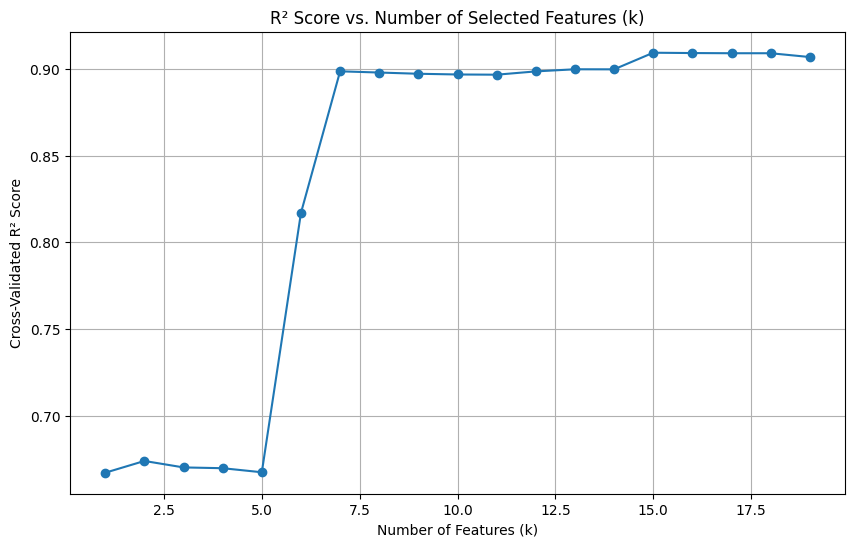

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['k'], results_df['R2'], marker='o')
plt.title('R² Score vs. Number of Selected Features (k)')
plt.xlabel('Number of Features (k)')
plt.ylabel('Cross-Validated R² Score')
plt.grid(True)
plt.show()